**DS 301: Applied Data Modeling and Predictive Analysis**

**Lecture 7 – Feature Selection**

# Data Manipulation and Visualization
Nok Wongpiromsarn, 8 August 2022

**Load the automobile price data**

Automobile_price_data_Raw.csv can be downloaded from

https://github.com/MicrosoftLearning/Principles-of-Machine-Learning-Python/tree/master/Module3

We put it under the *datasets* folder.

In [1]:
import os
import pandas as pd

data_path = os.path.join("datasets", "automobile.csv")
data = pd.read_csv(data_path)

**Examine the data using pandas**

In [2]:
# Print a concise summary of the data
data.info()

# Print the first 10 rows of data
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


**Remove rows based on column value and change data type of columns**

In [3]:
# Remove all rows with ? price or horsepower
data = data[(data.price != "?") & (data.horsepower != "?")]

# Change the data type of price and horsepower from *object* to a suitable numeric type
data.price = pd.to_numeric(data.price)
data.horsepower = pd.to_numeric(data.horsepower)

# Check the type of the price column
print("Price type: {}".format(data.dtypes["price"]))
print("Horsepower type: {}\n\n".format(data.dtypes["horsepower"]))

# Check info again
data.info()

Price type: int64
Horsepower type: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  199 non-null    object 
 2   make               199 non-null    object 
 3   fuel-type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         199 non-null    object 
 7   drive-wheels       199 non-null    object 
 8   engine-location    199 non-null    object 
 9   wheel-base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb-weight        199 non-null    int64  
 14  engine-type        199 non-null    object 
 15  num-of-cylinders   199 non-null

**Filter the columns based on data type**

Select only columns with *object* type.

In [4]:
# Print the type of each column
print("{}\n\n".format(data.dtypes))

# Construct a dataframe data_object with only columns of type object
data_object = data.select_dtypes(include=[object])

# Check data_object info
data_object.info()

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   normalized-losses  199 non

**Plot the data using seaborn**

Use *boxplot* to show the three quartile values of the distribution along with extreme values.

<AxesSubplot:xlabel='make', ylabel='price'>

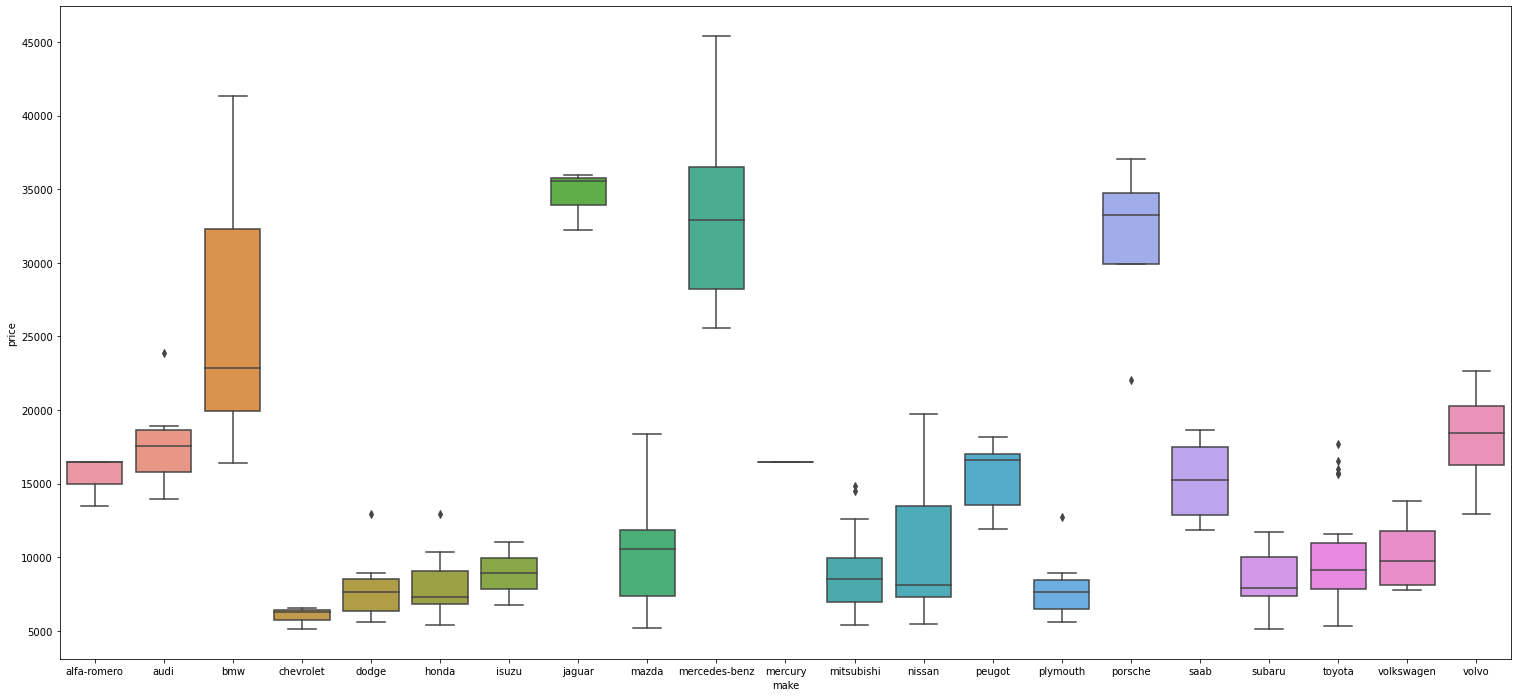

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(26, 12))
sns.boxplot(x="make", y="price", data=data)

<AxesSubplot:xlabel='body-style', ylabel='price'>

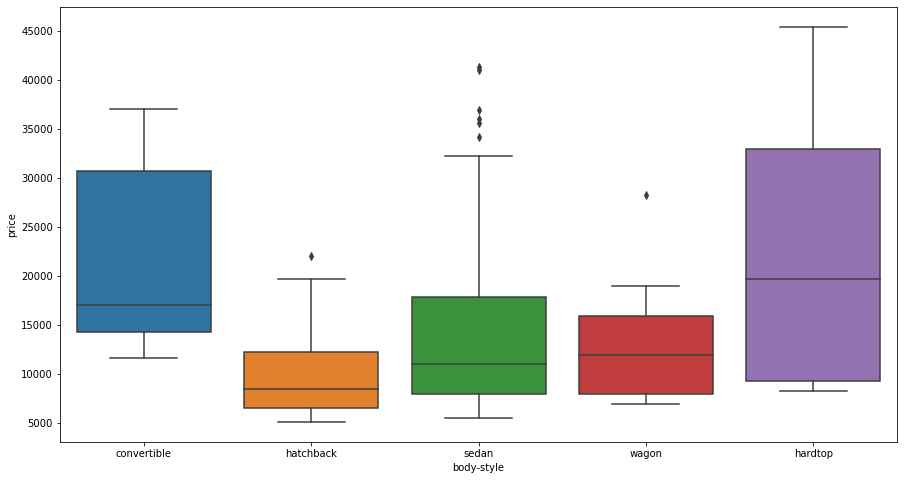

In [6]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="body-style", y="price", data=data)

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

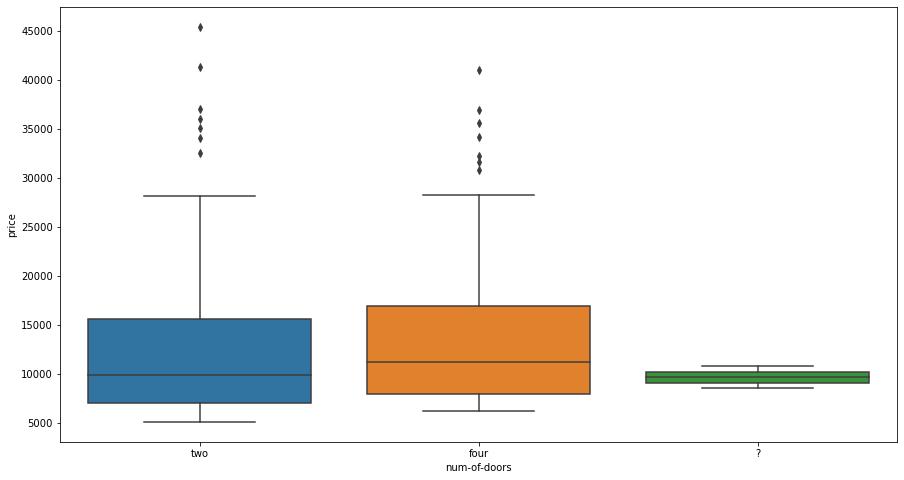

In [7]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="num-of-doors", y="price", data=data)

<AxesSubplot:xlabel='fuel-type', ylabel='price'>

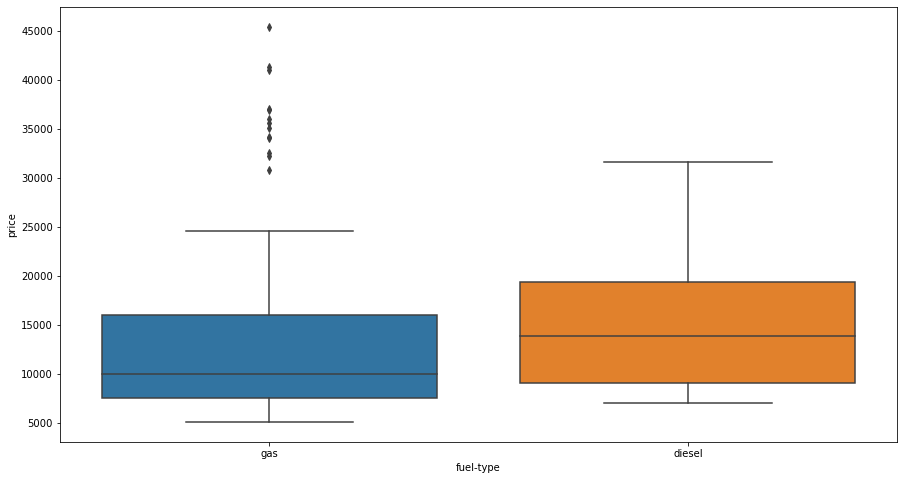

In [8]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="fuel-type", y="price", data=data)

<AxesSubplot:xlabel='aspiration', ylabel='price'>

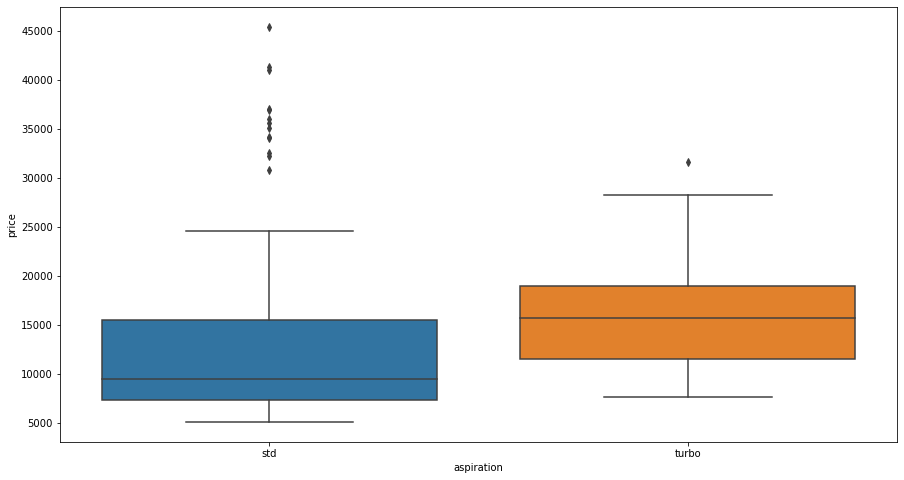

In [9]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="aspiration", y="price", data=data)

<AxesSubplot:xlabel='aspiration', ylabel='price'>

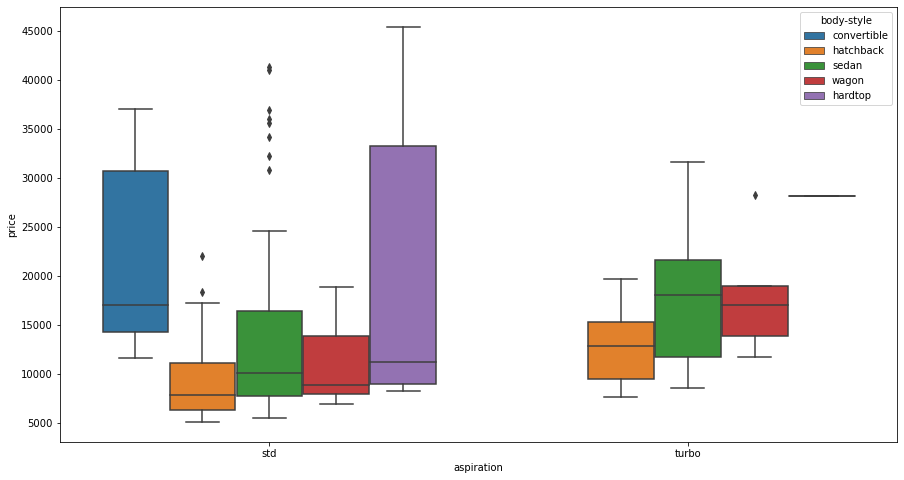

In [10]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="aspiration", y="price", hue="body-style", data=data)

Use *pairplot* to plot pairwise relationships of relevant features.

This creates a grid of Axes such that each numeric variable in data will be shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

Use *hue* to map plot aspects to different colors.

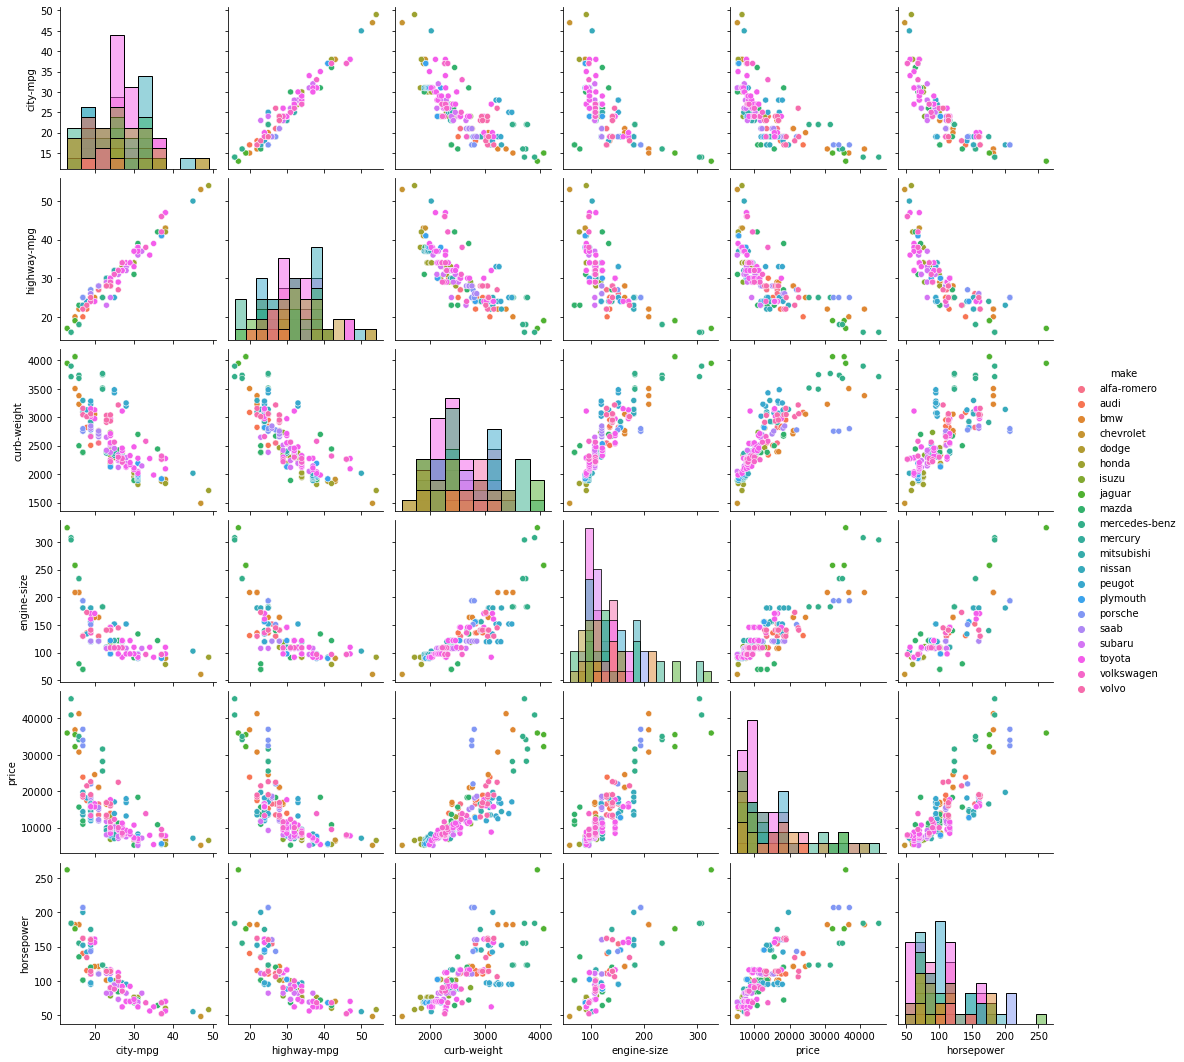

In [11]:
sns.pairplot(data.loc[:,["city-mpg", "highway-mpg", "curb-weight", "make", "engine-size", "price", "horsepower"]], 
             hue="make", diag_kind="hist");

Use *kind="reg"* to fit linear regression models to the scatter plots.

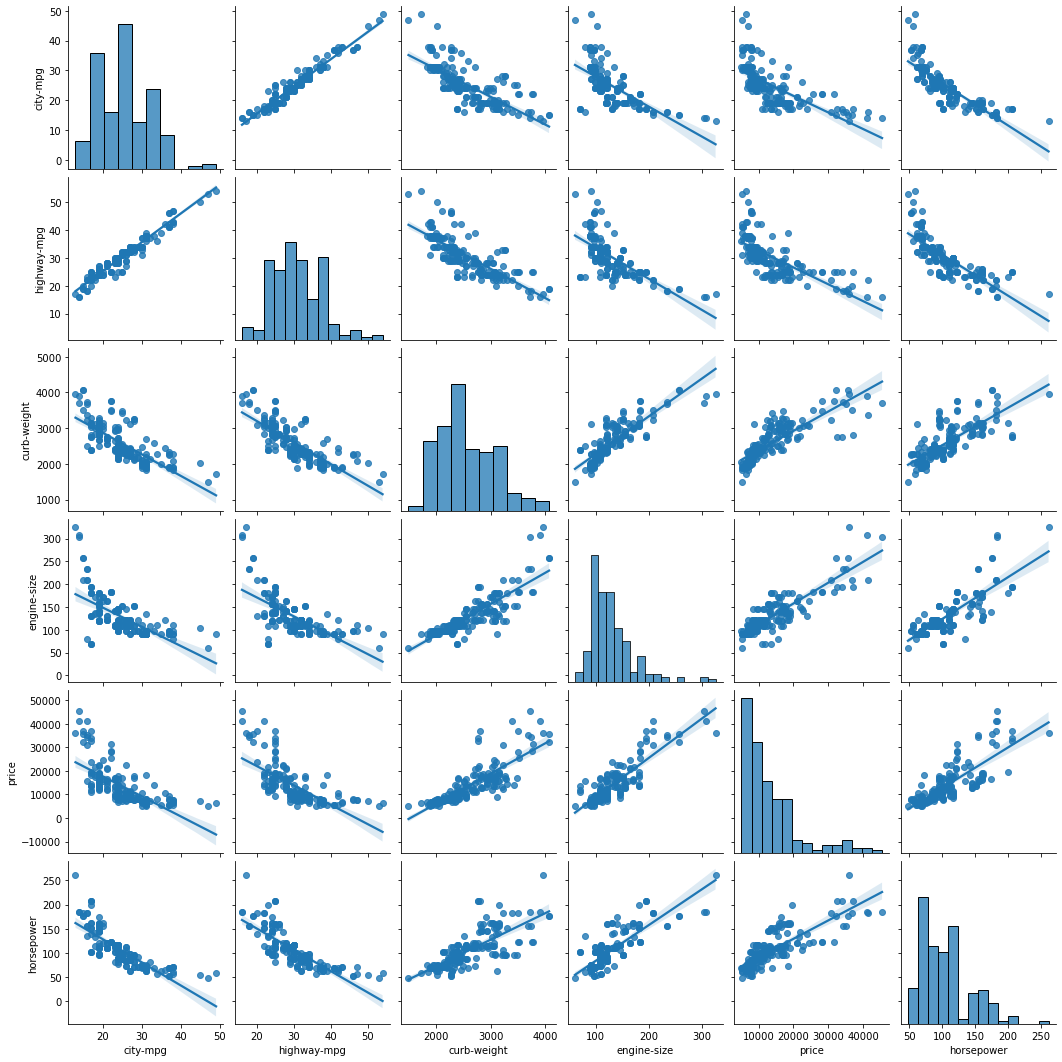

In [12]:
sns.pairplot(data.loc[:,["city-mpg", "highway-mpg", "curb-weight", "make", "engine-size", "price", "horsepower"]], 
             kind='reg');

**Visualize the correlation matrix**

In [13]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.00,-0.54,-0.37,-0.24,-0.55,-0.23,-0.11,-0.18,0.08,-0.04,0.04,-0.08
wheel-base,-0.54,1.00,0.88,0.82,0.59,0.78,0.57,0.25,0.37,-0.47,-0.54,0.58
length,-0.37,0.88,1.00,0.86,0.49,0.88,0.69,0.16,0.58,-0.66,-0.70,0.69
width,-0.24,0.82,0.86,1.00,0.31,0.87,0.73,0.19,0.62,-0.63,-0.68,0.75
height,-0.55,0.59,0.49,0.31,1.00,0.31,0.08,0.26,-0.09,-0.05,-0.11,0.13
curb-weight,-0.23,0.78,0.88,0.87,0.31,1.00,0.85,0.16,0.76,-0.75,-0.79,0.84
engine-size,-0.11,0.57,0.69,0.73,0.08,0.85,1.00,0.03,0.82,-0.65,-0.68,0.87
compression-ratio,-0.18,0.25,0.16,0.19,0.26,0.16,0.03,1.00,-0.21,0.33,0.27,0.07
horsepower,0.08,0.37,0.58,0.62,-0.09,0.76,0.82,-0.21,1.00,-0.82,-0.80,0.81
city-mpg,-0.04,-0.47,-0.66,-0.63,-0.05,-0.75,-0.65,0.33,-0.82,1.00,0.97,-0.69


**Focus on the *price* column, we see that *engine-size* has the highest correlation**

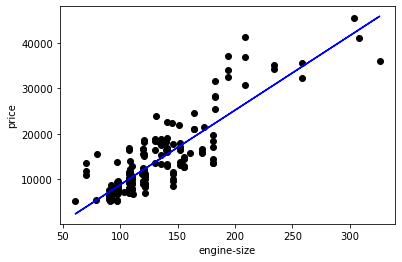

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = data[['engine-size']]
y = data['price']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# Apply least squares linear regression
reg = LinearRegression().fit(x_train.values, y_train)
y_predict = reg.predict(x.values)

# Visualize the results
plt.scatter(x.values, y, color='black')
plt.plot(x.values, y_predict, color='blue')
plt.xlabel("engine-size")
plt.ylabel("price")
plt.show()

Inspect the model

In [15]:
print("Coefficient: {}".format(reg.coef_))
print("Intercept: {}".format(reg.intercept_))

print(reg.predict([[101]]) - reg.predict([[100]]))
print(reg.predict([[0]]))

Coefficient: [164.07790224]
Intercept: -7637.915001340007
[164.07790224]
[-7637.91500134]


Evaluate the model

In [16]:
# Root mean squared error
from sklearn.metrics import mean_squared_error

y_test_predict = reg.predict(x_test.values)
rmse = mean_squared_error(y_test, y_test_predict, squared=False)
print("RMSE: {}".format(rmse))

# Coefficient of determination
rsquared = reg.score(x_test.values, y_test)
print("Coefficient of determination: {}".format(rsquared))

RMSE: 3288.249347476708
Coefficient of determination: 0.8474655317398789


**Add more features**

1. Add curb-weight

In [17]:
x = data[['engine-size', 'curb-weight']]
y = data['price']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# Apply least squares linear regression
reg = LinearRegression().fit(x_train, y_train)
print("Coefficient: {}".format(reg.coef_))
print("Intercept: {}".format(reg.intercept_))

y_test_predict = reg.predict(x_test)
rmse = mean_squared_error(y_test, y_test_predict, squared=False)
rsquared = reg.score(x_test, y_test)
print("RMSE: {}".format(rmse))
print("Coefficient of determination: {}".format(rsquared))

Coefficient: [106.4886396    5.38837304]
Intercept: -14095.388501114034
RMSE: 3041.7403413973307
Coefficient of determination: 0.8694782816952038


2. Add whee-base, which results in worse performance

In [18]:
x = data[['engine-size', 'curb-weight', 'wheel-base']]
y = data['price']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# Apply least squares linear regression
reg = LinearRegression().fit(x_train, y_train)
print("Coefficient: {}".format(reg.coef_))
print("Intercept: {}".format(reg.intercept_))

y_test_predict = reg.predict(x_test)
rmse = mean_squared_error(y_test, y_test_predict, squared=False)
rsquared = reg.score(x_test, y_test)
print("RMSE: {}".format(rmse))
print("Coefficient of determination: {}".format(rsquared))

Coefficient: [ 100.8109814     7.17354795 -147.64195082]
Intercept: -3343.583509364864
RMSE: 3244.2581972112357
Coefficient of determination: 0.8515195317469323


3. Find a good combination based on the correlation matrix

In [19]:
x = data[['engine-size', 'curb-weight', 'width', 'highway-mpg']]
y = data['price']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# Apply least squares linear regression
reg = LinearRegression().fit(x_train, y_train)
print("Coefficient: {}".format(reg.coef_))
print("Intercept: {}".format(reg.intercept_))

y_test_predict = reg.predict(x_test)
rmse = mean_squared_error(y_test, y_test_predict, squared=False)
rsquared = reg.score(x_test, y_test)
print("RMSE: {}".format(rmse))
print("Coefficient of determination: {}".format(rsquared))

Coefficient: [ 108.36839727    2.50427498  423.05724973 -121.89462457]
Intercept: -31076.62946551562
RMSE: 2886.7049393846432
Coefficient of determination: 0.8824444066522088
